This project is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"), 
we are building 
a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.
 

Exploratory Data Analysis (EDA
)

In [1]:
#Exploratory Data Analysis (EDA) and Feature Engineering for Term Deposit Prediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#load dataset
df = pd.read_csv("C:/data/term_deposit/term_deposit/datasets/bank-additional-full.csv", sep=';')

In [3]:
# Display basic information

print("Dataset Shape ", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape  (41188, 21)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

First 5 Rows:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4  

<function matplotlib.pyplot.show(close=None, block=None)>

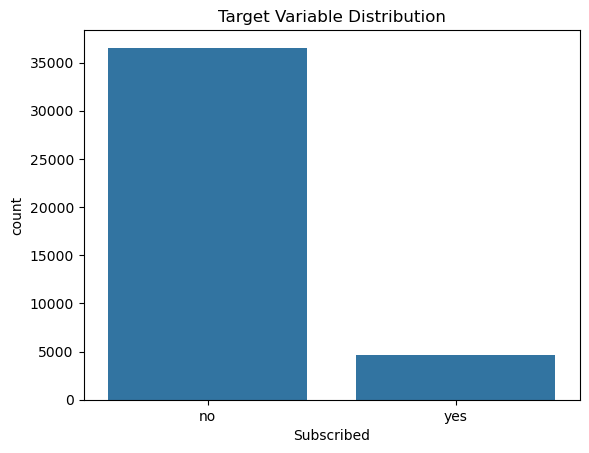

In [4]:
# target variables

plt.Figure(figsize=(6,4))
sns.countplot(x="y", data = df)
plt.title("Target Variable Distribution")
plt.xlabel("Subscribed")
plt.show


In [5]:
#summary statistics of numerical features

print("\n Summary statistics:\n", df.describe())


 Summary statistics:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.57

In [6]:
# Check unique values for categorical features

categorical_cols= df.select_dtypes (include ="object").columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Column: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Column: housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Column: loan
loan
no         33950
yes         6248
unknown      9

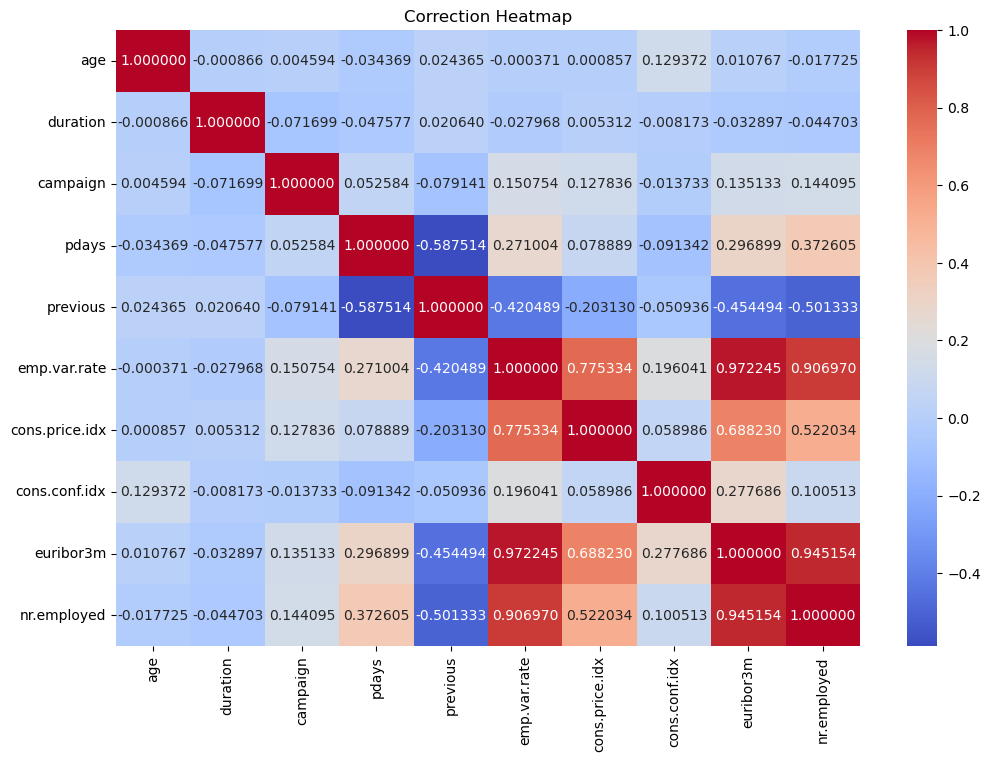

In [7]:
# correlation eatmap for numerical features

plt.figure (figsize= (12, 8))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap= "coolwarm", fmt="2f")
plt.title("Correction Heatmap")
plt.show()

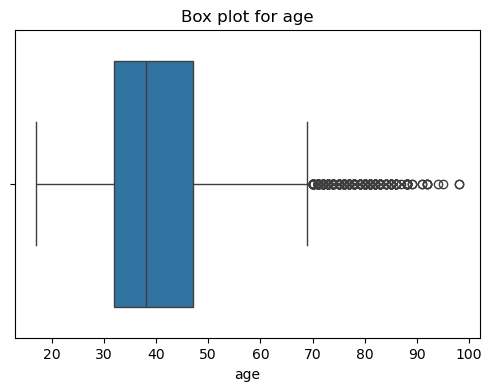

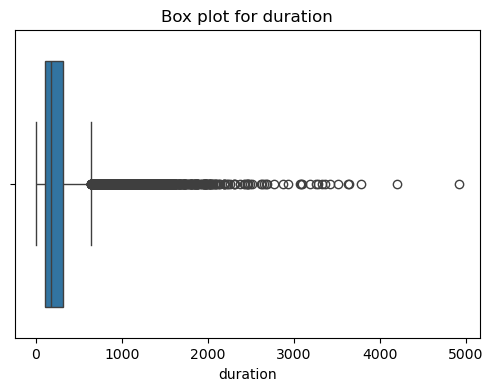

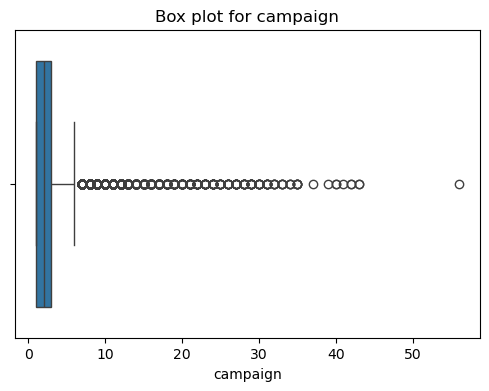

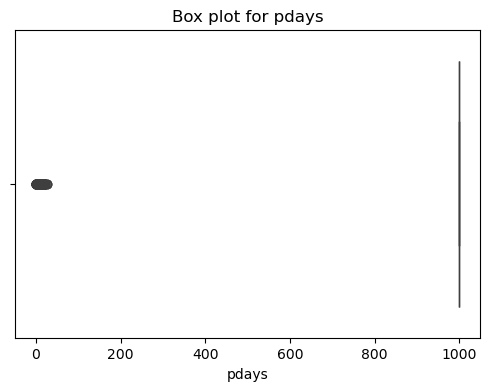

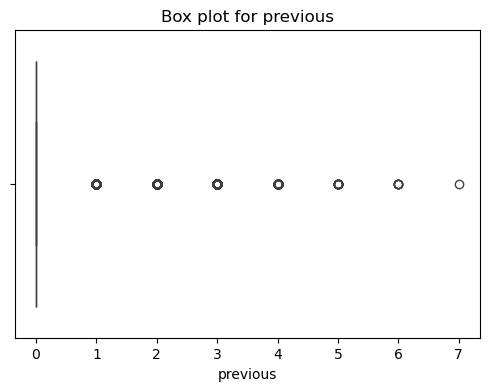

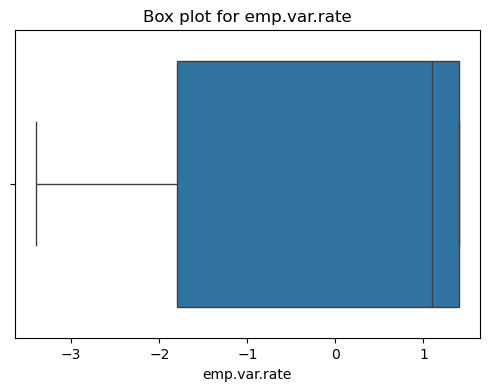

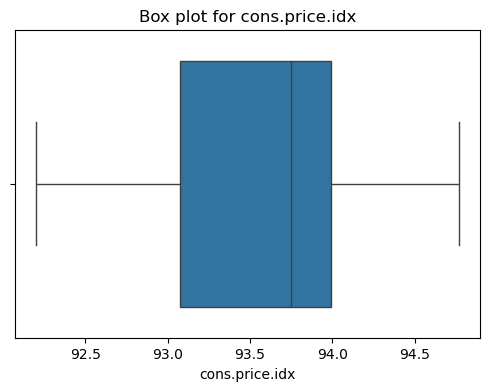

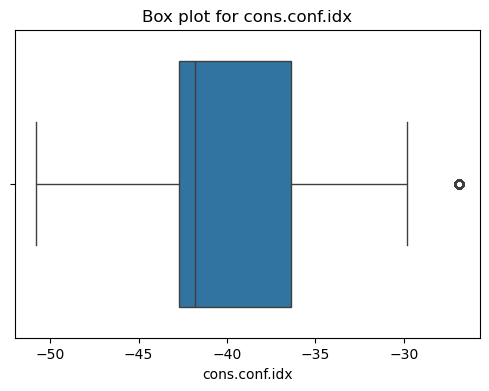

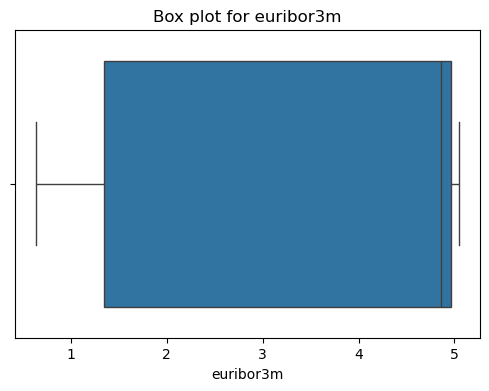

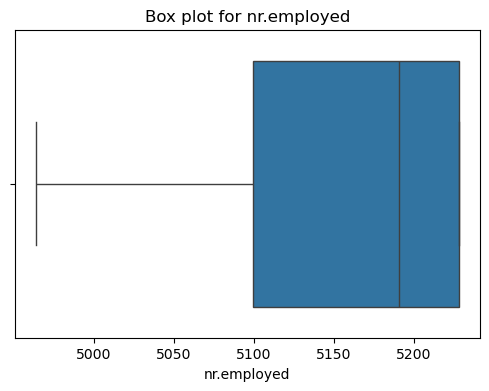

In [8]:
#box plots for outlier detection

numerical_cols=df.select_dtypes(include=["int64", "float64"]).columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')
    plt.show()


In [9]:
# check for missing values

print("\nMisssing values:\n", df.isnull().sum())


Misssing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##Feature Engineering

In [10]:
#Binary Encode Target
df["y"] = df["y"].map({"yes": 1, "no": 0})

#Encode categorical variables using labelEncoder

label_encoders ={}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] =le.fit_transform(df[col])
    label_encoders[col] = le

# create new feature: contact_rate = previous / (campaign + 1)
df["contact_rate"] = df["previous"] / (df["campaign"]+1)

# print updated dataset 
                            
print("\n New Dataset:\n")
print(df.head())


 New Dataset:

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0            1  ...    999         0         1           1.1          93.994   
1            1  ...    999         0         1           1.1          93.994   
2            1  ...    999         0         1           1.1          93.994   
3            1  ...    999         0         1           1.1          93.994   
4            1  ...    999         0         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  contact